# Project: Bankruptcy Prevention

### Problem Statement
   To predict if a company will file for bankruptcy or not

### Business understanding

Bankruptcy prediction, also named as corporate bankruptcy prediction or corporate failure prediction, has long been a significant topic in the field of accounting and finance, since the health of a firm is highly important to its creditors, investors, shareholders, partners, even its buyers and suppliers. 

Bankruptcy is a state where a company is not able to run its business or continue its operation in the future because of its financial condition or debts. Any firm or investor needs to know the state of bankruptcy before they start investing in the company. Having a standardized approach looks like a generous idea in predicting any state but is very unlikely that the method will give satisfying results because of the real-world situations established.

Researchers and practitioners have been dedicated to developing methods and techniques to predict the bankruptcy of firms more quickly and more accurately.


### Objective of the analysis

The goal of this project is to build a model that can predict Bankruptcy. The challenge behind Bankruptcy prediction in machine learning is that Bankruptcy samples are far less common as compared to Non-Bankruptcy.

Bankruptcy prediction is a challenging problem, given the variety of Bankruptcy patterns and relatively small ratio of known Bankruptcy in typical samples. While building prediction models, the savings from loss prevention needs to be balanced with the cost of false alerts. Machine learning techniques allow for improving predictive accuracy, enabling loss control units to achieve higher coverage with low false positive rates. 

Using the given data, different types of  machine learning models are build by varying different parameters in each type of model. The accuracy, recall and precision are checked for each model. The model which gives the best results is selected as our final model which clearly classifies whether a company goes Bankruptcy or not.

### About The Dataset

#### Input variables:

The data file contains 7 features about 250 companies
The data set includes the following variables:

1.industrial_risk      : 0=low risk, 0.5=medium risk, 1=high risk.

2.management_risk       : 0=low risk, 0.5=medium risk, 1=high risk.

3.financial flexibility : 0=low flexibility, 0.5=medium flexibility, 1=high flexibility. 

4.credibility           : 0=low credibility, 0.5=medium credibility, 1=high credibility.

5.competitiveness       : 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.

6.operating_risk        :  0=low risk, 0.5=medium risk, 1=high risk.

7.class                 :  bankruptcy, non-bankruptcy (target variable).


Following are the details of the qualitative risk factors which mentions their risk components:

+ Industry risk : Government policies and International agreements, Cyclicality, Degree of competition, The price and stability of market supply, The size and growth of market demand, The sensitivity to changes in macroeconomic factors, Domestic and international competitive power, Product Life Cycle.

+ Management risk : Ability and competence of management, Stability of management, The relationship between management/ owner, Human resources management, Growth process/business performance, Short and long term business planning, achievement and feasibility.

+ Financial Flexibility : Direct financing, Indirect financing, Other financing

+ Credibility : Credit history,reliability of information, The relationship with financial institutes.

+ Competitiveness : Market position, The level of core capacities, Differentiated strategy,

+ Operating Risk (OP): The stability and diversity of procurement, The stability of transaction, The efficiency of production, The prospects for demand for product and service, Sales diversification, Sales price and settlement condition, Collection of A/R, Effectiveness of sale network.

#### Resource
https://archive.ics.uci.edu/ml/datasets/qualitative_bankruptcy

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from collections import Counter
from imblearn.over_sampling import SMOTE 
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score,average_precision_score,precision_recall_curve

# Import Data and perform EDA

In [2]:
#import Data Frame
df = pd.read_csv("bankruptcy-prevention.csv",sep=';')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
df.shape

(250, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
# Renaming the columns
df = df.rename(columns={' management_risk':'management_risk', 
                                          ' financial_flexibility':'financial_flexibility',
                                          ' credibility':'credibility', 
                                          ' competitiveness':'competitiveness', 
                                          ' operating_risk':'operating_risk',' class':'class'})
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
industrial_risk,250.0,0.518,0.411526,0.0,0.0,0.5,1.0,1.0
management_risk,250.0,0.614,0.410705,0.0,0.5,0.5,1.0,1.0
financial_flexibility,250.0,0.376,0.401583,0.0,0.0,0.5,0.5,1.0
credibility,250.0,0.470,0.415682,0.0,0.0,0.5,1.0,1.0
competitiveness,250.0,0.476,0.440682,0.0,0.0,0.5,1.0,1.0
operating_risk,250.0,0.570,0.434575,0.0,0.0,0.5,1.0,1.0


In [7]:
#Checking for Null values

df.isna().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [8]:
#checking Duplciate Values
df[df.duplicated()]
print("dataset shape before removing duplicates is :", df.shape)

dataset shape before removing duplicates is : (250, 7)


In [9]:
#Dropping the duplicate records 
df=df.drop_duplicates(keep="first")
print("dataset shape after removing duplicates is :", df.shape)

dataset shape after removing duplicates is : (103, 7)


In [10]:
# Target variable value counts 
print ("before encoding the target variable distribution is:\n",df["class"].value_counts()) 

before encoding the target variable distribution is:
 non-bankruptcy    78
bankruptcy        25
Name: class, dtype: int64


# Visualization 

### Univarate Analysis

<AxesSubplot: ylabel='operating_risk'>

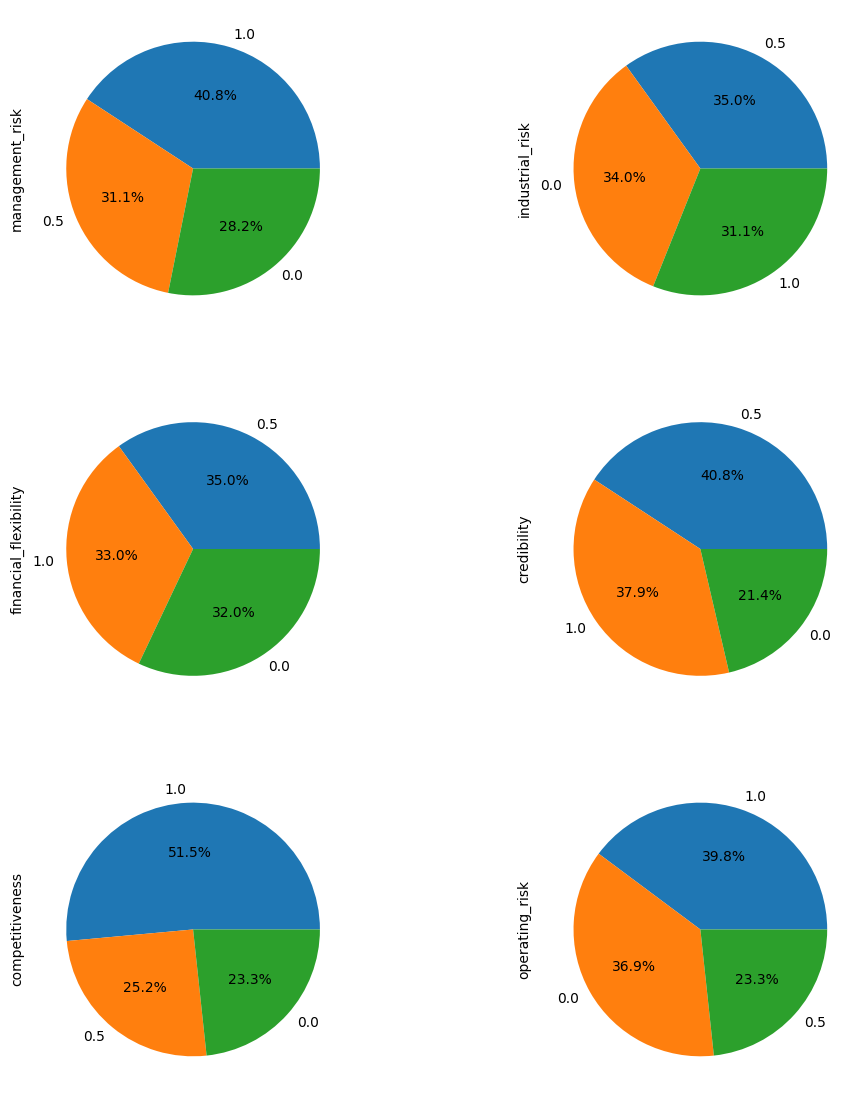

In [11]:
# Dependent Variables data
plt.figure(figsize=(12,14))
plt.subplot(3,2,1)
df['management_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,2)
df['industrial_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,3)
df['financial_flexibility'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,4)
df['credibility'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,5)
df['competitiveness'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
df['operating_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')

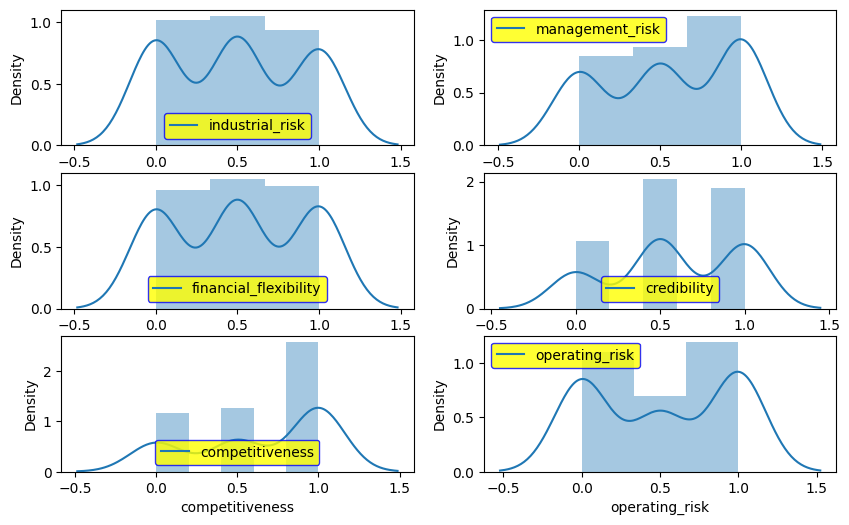

In [12]:
# Drawing the distplots for dependant variables
plt.figure(figsize=(10,6))

plt.subplot(3,2,1)
sns.distplot(df['industrial_risk'])
plt.legend(["industrial_risk"],loc='lower center',facecolor='yellow',edgecolor='blue')

plt.subplot(3,2,2)
sns.distplot(df["management_risk"])
plt.legend(["management_risk"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.subplot(3,2,3)
sns.distplot(df["financial_flexibility"])
plt.legend(["financial_flexibility"],loc='lower center',facecolor='yellow',edgecolor='blue')

plt.subplot(3,2,4)
sns.distplot(df["credibility"])
plt.legend(["credibility"],loc='lower center',facecolor='yellow',edgecolor='blue')

plt.subplot(3,2,5)
sns.distplot(df["competitiveness"])
plt.legend(["competitiveness"],loc='lower center',facecolor='yellow',edgecolor='blue')


plt.subplot(3,2,6)
sns.distplot(df["operating_risk"])
plt.legend(["operating_risk"],loc='upper left',facecolor='yellow',edgecolor='blue')


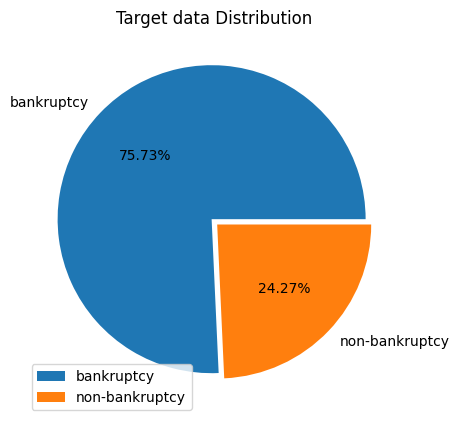

In [13]:
#Pie plot for target Variable
plt.figure(figsize = (8,5))
plt.pie(df['class'].value_counts(),labels=df['class'].unique(), explode = [0.05,0.0],autopct= '%.2f%%')

plt.legend(loc= 'lower left')
plt.title("Target data Distribution ")
plt.show()

### Bivariate Analysis

### Checking relation between Dependent Variables vs target

Text(0.5, 9.444444444444438, 'management_risk vs class')

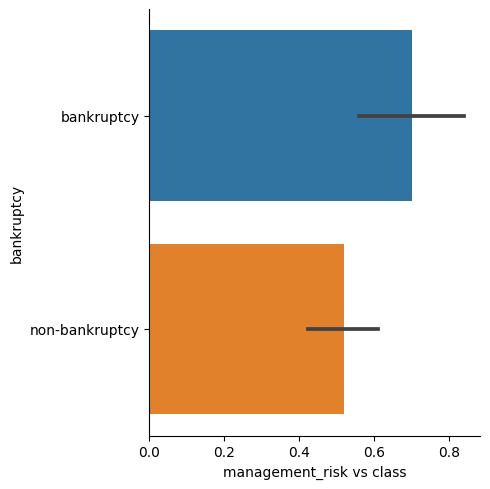

In [14]:
sns.catplot(x='management_risk',y='class',data=df,kind='bar')
plt.ylabel('bankruptcy')
plt.xlabel('management_risk vs class')


Text(0.5, 9.444444444444438, 'industrial_risk vs class')

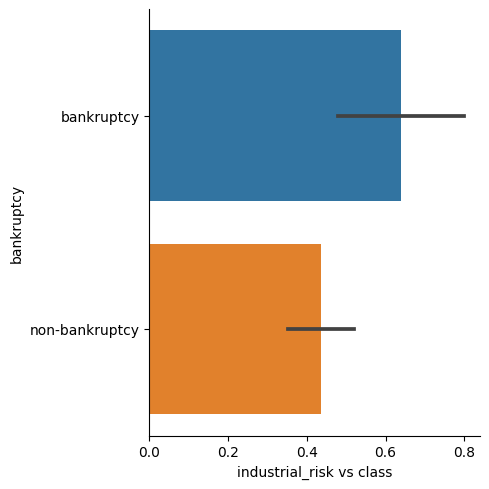

In [15]:
sns.catplot(x='industrial_risk',y='class',data=df,kind='bar')
plt.ylabel('bankruptcy')
plt.xlabel('industrial_risk vs class')

Text(0.5, 9.444444444444438, 'operating_risk vs class')

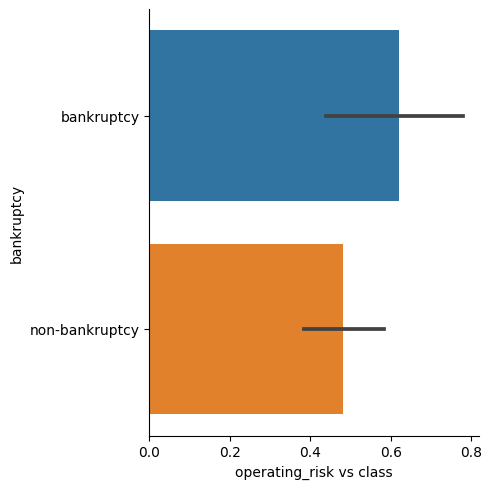

In [16]:
sns.catplot(x='operating_risk',y='class',data=df,kind='bar')
plt.ylabel('bankruptcy')
plt.xlabel('operating_risk vs class')

Text(0.5, 9.444444444444438, 'financial_flexibility vs class')

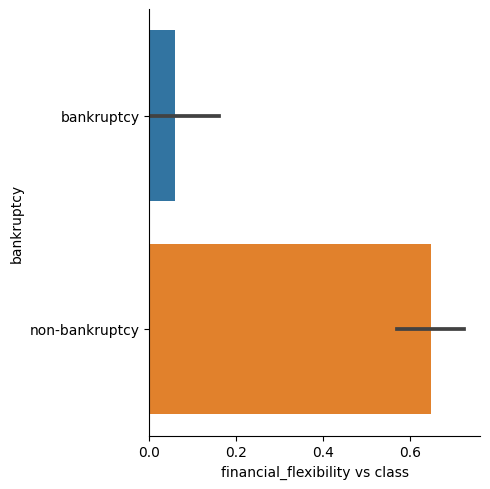

In [17]:
sns.catplot(x='financial_flexibility',y='class',data=df,kind='bar')
plt.ylabel('bankruptcy')
plt.xlabel('financial_flexibility vs class')

Text(0.5, 9.444444444444438, 'credibility vs class')

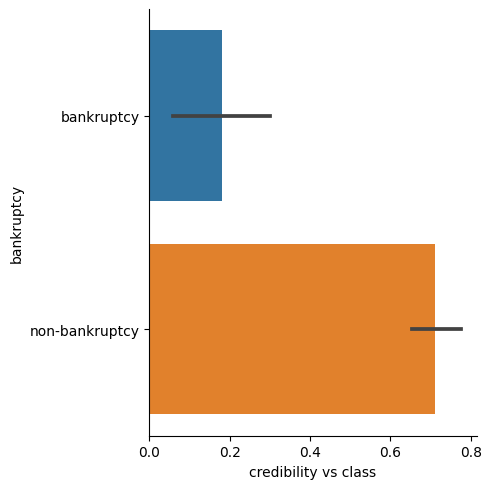

In [18]:
sns.catplot(x='credibility',y='class',data=df,kind='bar')
plt.ylabel('bankruptcy')
plt.xlabel('credibility vs class')

Text(0.5, 9.444444444444438, 'competitiveness vs class')

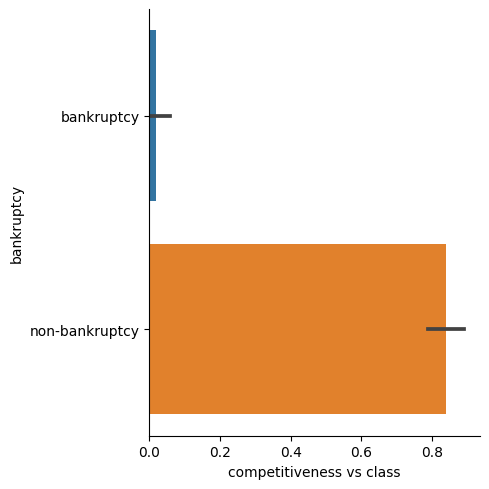

In [19]:
sns.catplot(x='competitiveness',y='class',data=df,kind='bar')
plt.ylabel('bankruptcy')
plt.xlabel('competitiveness vs class')

#### From the above we  can infer that with the current data 
    -management risk , industrial risk  and operating risk contributing towards more bankruptcy 
    - Where as Finacial flexibility, credibility and competitiveness has less contribution towards bankruptcy

### Relation between dependant variables

### For the dependant variables we will group them in 2 categories 
     - Management, industrial and operation risks 
     - financial flexibility, credibility, competitiveness 

###### Management Risk vs Operating Risk

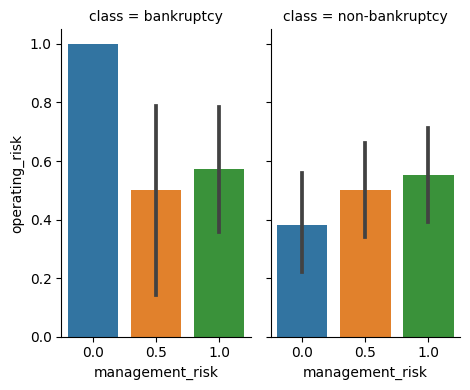

In [20]:
sns.catplot(
    data=df, x="management_risk", y="operating_risk", col="class",
    kind="bar", height=4, aspect=.6,
)

###### Management Risk vs Industrial Risk

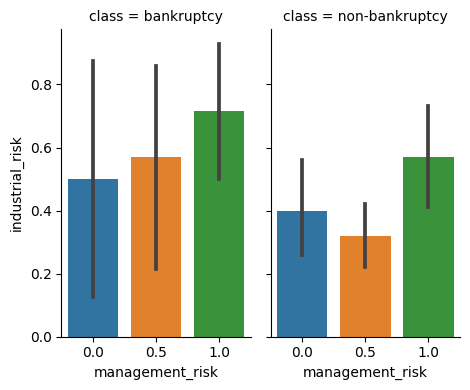

In [21]:
sns.catplot(
    data=df, x="management_risk", y="industrial_risk", col="class",
    kind="bar", height=4, aspect=.6,
)

###### Operating Risk vs Industrial risk 

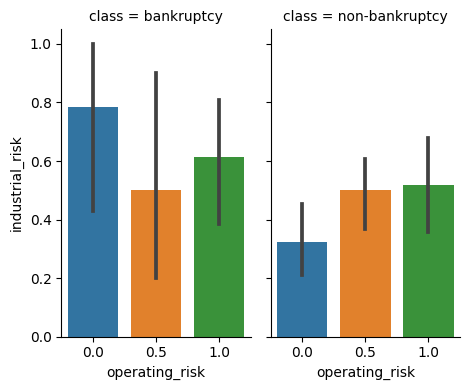

In [22]:
sns.catplot(
    data=df, x="operating_risk", y="industrial_risk", col="class",
    kind="bar", height=4, aspect=.6,
)

    -From the above three , we can infer that the below contributes more towards bankruptcy
     - High operation risk and low management risk
     - High Management and Industrial Risk
     - High industrial Risk and low operating risk

###### Financial_flexibility vs Credibility

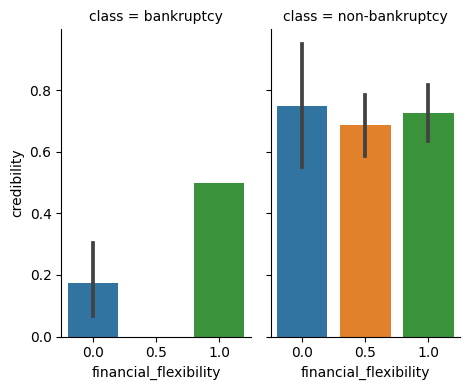

In [23]:
sns.catplot(
    data=df, x="financial_flexibility", y="credibility", col="class",
    kind="bar", height=4, aspect=.6,
)

###### Competitiveness vs Credibility

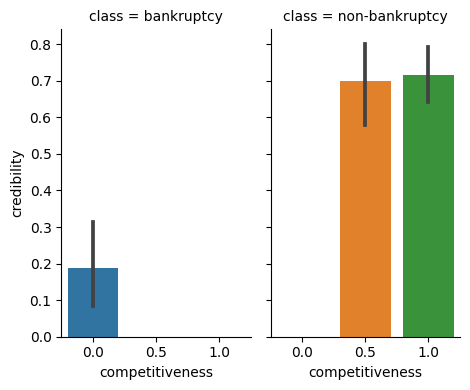

In [24]:
sns.catplot(
    data=df, x="competitiveness", y="credibility", col="class",
    kind="bar", height=4, aspect=.6,
)

###### Financial flexibility vs Competitiveness

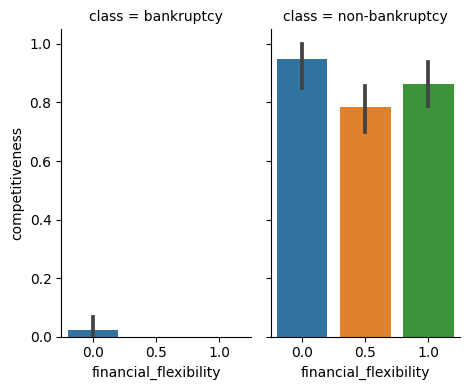

In [25]:
sns.catplot(
    data=df, x="financial_flexibility", y="competitiveness", col="class",
    kind="bar", height=4, aspect=.6,
)

    -From the above three , we can infer that the below contributes more towards bankruptcy
     - low credibility and low financial flexibility
     - low credibility  and low competitiveness
     - low competitiveness Risk and low financial flexibility

In [26]:
# Target variable value counts 
print ("before encoding the target variable distribution is:\n",df["class"].value_counts()) 

before encoding the target variable distribution is:
 non-bankruptcy    78
bankruptcy        25
Name: class, dtype: int64


In [27]:
# Applying Label Encoder to the target column

label_encoder=preprocessing.LabelEncoder()
df['class']= label_encoder.fit_transform(df['class'])
print ("After encoding the target variable distribution is (1-->non-bankruptcy, 0--> Bankruptcy):\n",
       df["class"].value_counts()) 


After encoding the target variable distribution is (1-->non-bankruptcy, 0--> Bankruptcy):
 1    78
0    25
Name: class, dtype: int64


In [28]:
df.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
5,1.0,1.0,0.0,0.5,0.0,0.5,0
6,1.0,1.0,0.0,0.0,0.0,0.0,0
7,1.0,1.0,0.0,0.0,0.0,0.5,0
8,1.0,1.0,0.0,0.5,0.0,0.0,0
9,1.0,1.0,0.0,0.5,0.0,1.0,0


### Multi Variate Analysis

Text(0.5, 765.5815972222223, 'spearman correlation')

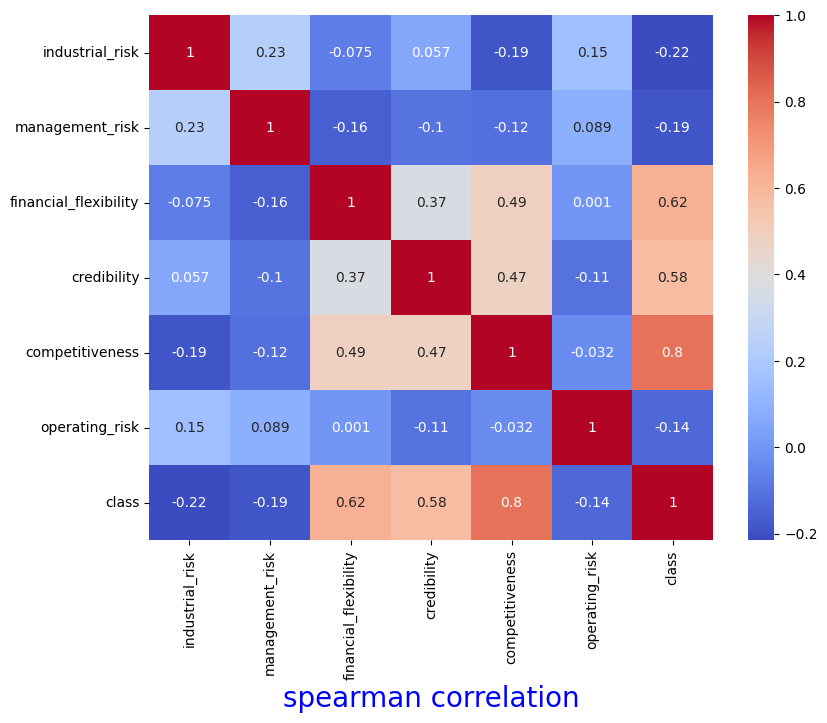

In [29]:
#Checking the correlation 
plt.figure(figsize=(20,15))
plt.subplot(2,2,2)
heatmap= sns.heatmap(df.corr(method='spearman'),annot=True,cmap="coolwarm")
plt.xlabel("spearman correlation",size=20,color="blue")

As we can see Financian flexiblity , competetiveness and credibility crossed the threshold (.5) is positvely correlated with the target variable

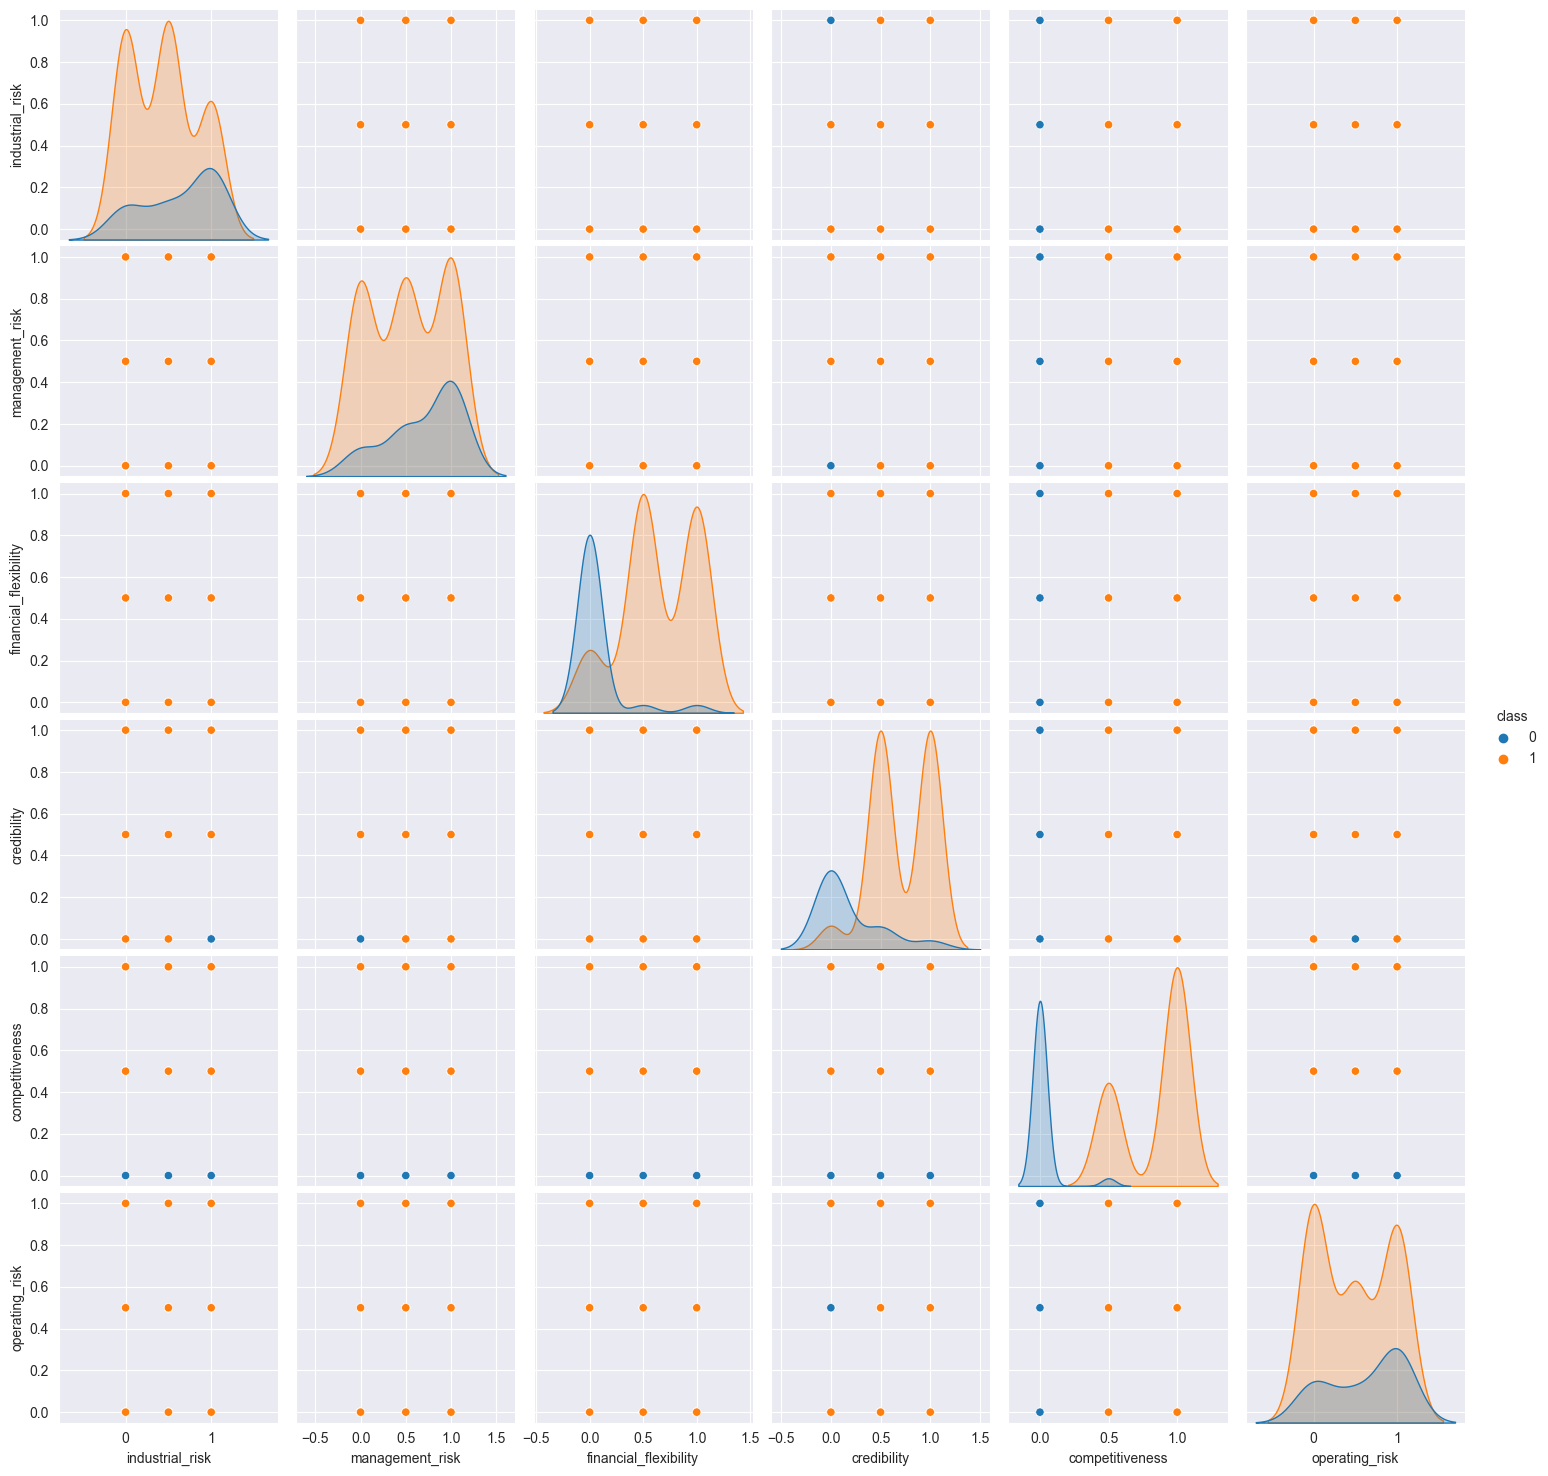

In [30]:
#Pair plot
sns.set_style('darkgrid')
sns.pairplot(df,hue='class')
plt.show()

## Feature Engineering

#### We can see the o/p data is not balanced, so either we could balance the data and check the accuracy score or we can keep the data as it is and check the precission and recall score. As part of feature engineering, we will apply balancing technique as well as raw data (imbalanced data) to build model and infer.

    The balancing techniques followed are
        1. Oversampling Random
        2. Undersampling Random 
        3. Oversampling SMOTE
        4. SVMSMOTE
        5. K Means Smote
        6. Mix of undersample and oversample - SMOTEENN

In [31]:
X = df.iloc[:,0:6]
X.shape

(103, 6)

In [32]:
y=df.iloc[:,6]
y.shape

(103,)

### Feature selection Technique

#### Chi Square

In [33]:
# Chi -sqaured feature Extraction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature = SelectKBest(score_func=chi2,k='all') 
fit = feature.fit(X, y)


print(fit.scores_)
bf = fit.transform(X)

[ 1.62465641  1.09864058 12.94053501  9.18232692 19.85394134  0.71322932]


In [34]:
cols=['Industrial_risk', 'Management_risk', 'Financial_flexibility',
       'Credibility', 'Competitiveness', 'Operating_risk']
feature_imp=pd.Series(fit.scores_,index=cols).sort_values(ascending=False)
feature_imp

Competitiveness          19.853941
Financial_flexibility    12.940535
Credibility               9.182327
Industrial_risk           1.624656
Management_risk           1.098641
Operating_risk            0.713229
dtype: float64

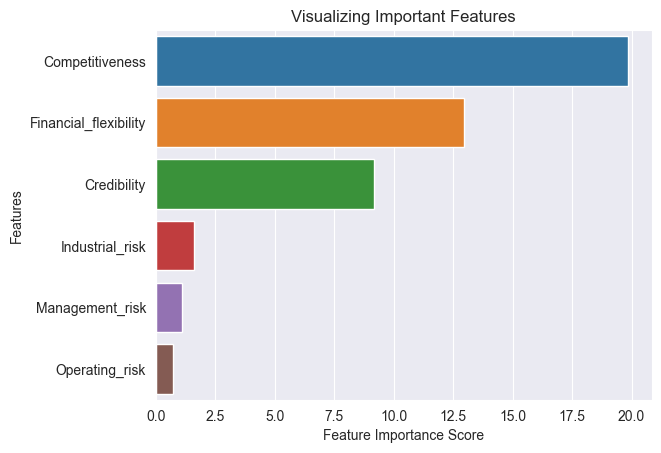

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### Random Forest

In [36]:
# define the model by using random trees and features
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=20)

rfc1.fit(X,y)
rfc1.feature_importances_

array([0.02142059, 0.01589689, 0.14671066, 0.20524687, 0.60146354,
       0.00926147])

In [37]:
cols=['Industrial_risk', 'Management_risk', 'Financial_flexibility',
       'Credibility', 'Competitiveness', 'Operating_risk']
feature_imp=pd.Series(rfc1.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

Competitiveness          0.601464
Credibility              0.205247
Financial_flexibility    0.146711
Industrial_risk          0.021421
Management_risk          0.015897
Operating_risk           0.009261
dtype: float64

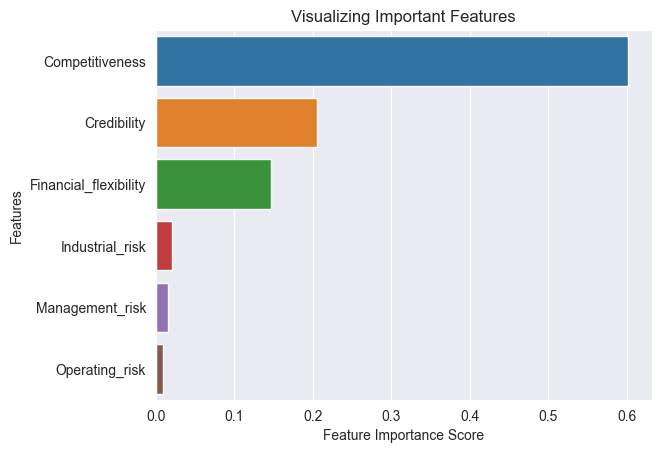

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model-1: Build Logistic Model with Raw Data 

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True)

In [40]:
(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((72, 6), (31, 6), (72,), (31,))

In [41]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
model.intercept_

array([-1.09690879])

In [43]:
model.coef_

array([[-0.56522202, -0.17234475,  1.5212349 ,  1.72937391,  2.59030981,
        -0.22757572]])

In [44]:
y_test_pred=model.predict(X_test)
ac(y_test_pred,y_test)

1.0

In [45]:
logi_conf=confusion_matrix(y_test_pred,y_test)
logi_conf

array([[ 8,  0],
       [ 0, 23]])

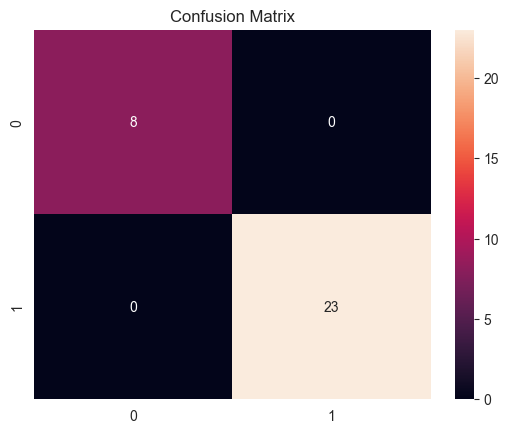

In [46]:
sns.heatmap(logi_conf,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [47]:
print( classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        23

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [48]:
logi_scr = classification_report (y_test, y_test_pred,output_dict=True)

In [49]:
logi_p0=logi_scr["0"]["precision"]
logi_p1=logi_scr["1"]["precision"]
logi_r0=logi_scr["0"]["recall"]
logi_r1=logi_scr["1"]["recall"]
logi_acc=logi_scr['accuracy']
logi_f1=logi_scr['macro avg']['f1-score']

### Plotting ROC Curve and AUC for the model

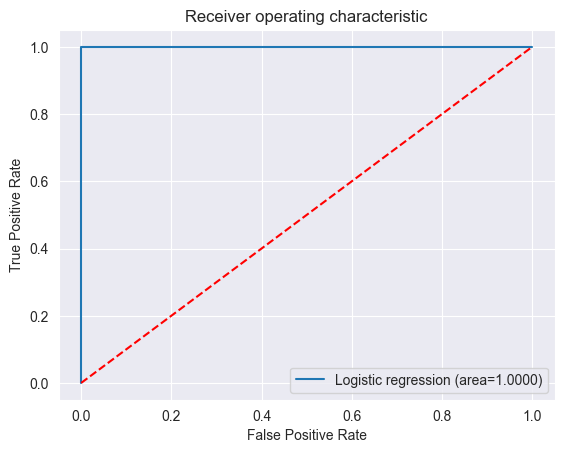

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc=roc_auc_score(y_test,y_test_pred)
auc

fpr, tpr, thresholds = roc_curve(y_test,y_test_pred) 
plt.plot(fpr, tpr, label='Logistic regression (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model-2: Build  KNearest Neighbors model using SMOTE Balancing technique

#### Performing SMOTE Balancing technique

In [51]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(X, y)

counter = Counter(y_sm)
print('After',counter)

Before Counter({1: 78, 0: 25})
After Counter({0: 78, 1: 78})


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size = 0.3,random_state=42)

In [53]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (109, 6)
Shape of X_test:  (47, 6)
Shape of y_train:  (109,)
Shape of y_test (47,)


In [54]:
nn = np.array(range(1,21))
params = dict(n_neighbors=nn)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  GridSearchCV, KFold
clf_knn = KNeighborsClassifier()
gscv_knn = GridSearchCV(estimator=clf_knn, param_grid=params,cv=10)
gscv_knn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [56]:
best_params_knn = gscv_knn.best_params_
best_params_knn

{'n_neighbors': 1}

### Building KNN model with best parameters

In [57]:
clf_knn = KNeighborsClassifier(**best_params_knn)
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Model Evaluation

In [58]:
y_pred_knn = clf_knn.predict(x_test)
y_pred_knn

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0])

In [59]:
cfm_knn = confusion_matrix(y_test,y_pred_knn)
cfm_knn

array([[21,  1],
       [ 0, 25]])

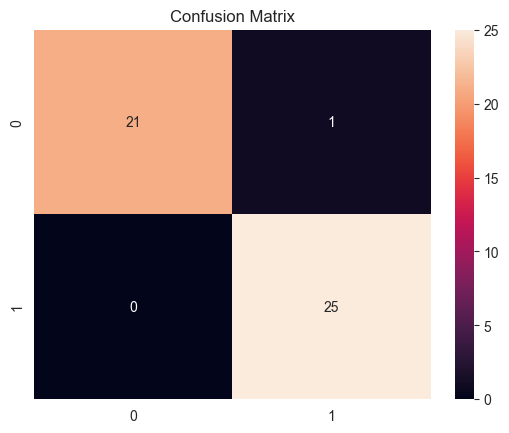

In [60]:
sns.heatmap(cfm_knn,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [61]:
#type(y_pred)
accuracy_knn = sum(y_test==y_pred_knn)/y_test.shape[0]
accuracy_knn

0.9787234042553191

In [62]:
CR_knn = classification_report (y_test, y_pred_knn)
print (CR_knn)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.96      1.00      0.98        25

    accuracy                           0.98        47
   macro avg       0.98      0.98      0.98        47
weighted avg       0.98      0.98      0.98        47



In [63]:
CR_knn_scr = classification_report (y_test, y_pred_knn,output_dict=True)

In [64]:
knn_p0=CR_knn_scr["0"]["precision"]
knn_p1=CR_knn_scr["1"]["precision"]
knn_r0=CR_knn_scr["0"]["recall"]
knn_r1=CR_knn_scr["1"]["recall"]
knn_acc=CR_knn_scr['accuracy']
knn_f1=CR_knn_scr['macro avg']['f1-score']

### Plotting ROC Curve and AUC for the model

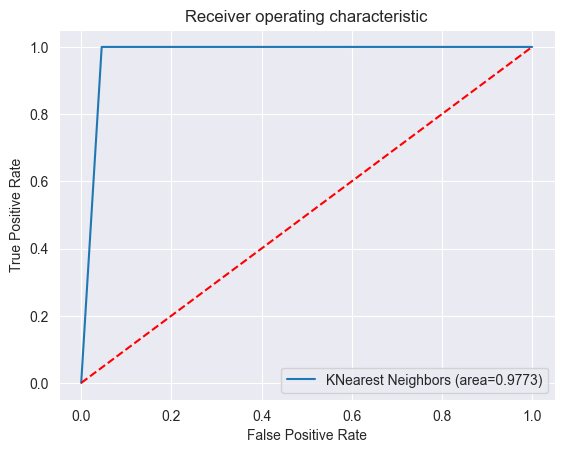

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc=roc_auc_score(y_test,y_pred_knn)
auc

fpr, tpr, thresholds = roc_curve(y_test,y_pred_knn) 
plt.plot(fpr, tpr, label='KNearest Neighbors (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model-3: Build a Decision Tree model Based on Kmeans Smote Sampling

#### Kmeans Smote Sampling

In [66]:
from imblearn.over_sampling import KMeansSMOTE

ksm = KMeansSMOTE(random_state=42,cluster_balance_threshold=0.2)

print('Original dataset shape %s' % Counter(y))

X_ksm, y_ksm = ksm.fit_resample(X,y)

print('After undersample dataset shape %s' % Counter(y_ksm))

Original dataset shape Counter({1: 78, 0: 25})
After undersample dataset shape Counter({0: 80, 1: 78})


In [67]:
X_train,X_test,y_train,y_test=train_test_split(X_ksm,y_ksm,test_size=0.30,shuffle=True)

In [68]:
from sklearn.tree import  DecisionTreeClassifier
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})


#### Building Decision Tree model with best parameters

In [69]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, splitter='random')

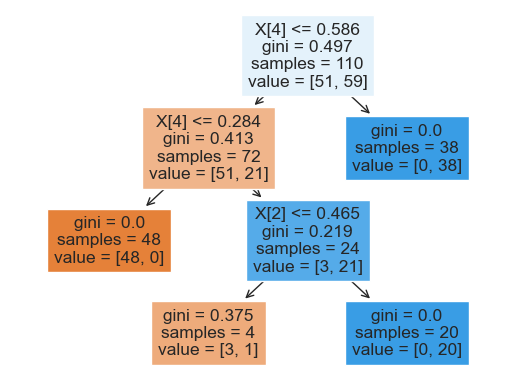

In [70]:
#plot the decision tree
from sklearn import tree
tree.plot_tree(tree_clf,filled=True);
plt.show()

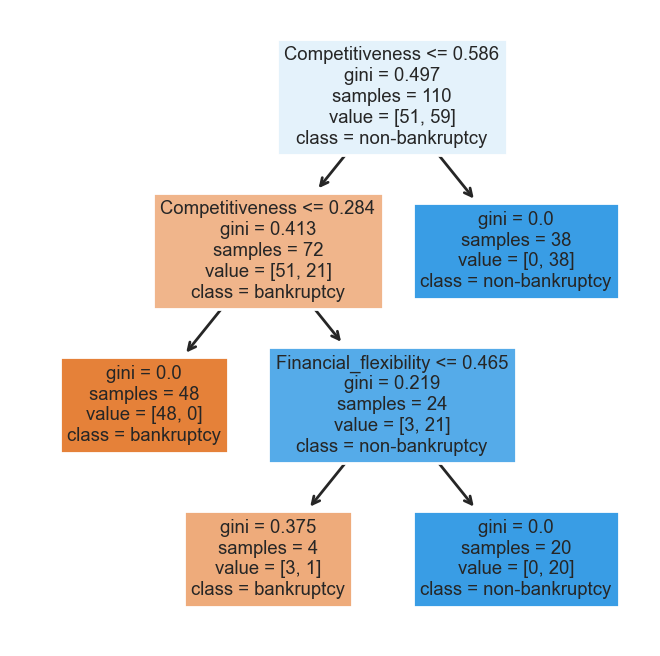

In [71]:
fn=['Industrial_risk', 'Management_risk', 'Financial_flexibility',
       'Credibility', 'Competitiveness', 'Operating_risk']
cm=['bankruptcy','non-bankruptcy']
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=200)    #dpi- pic size 
tree.plot_tree(tree_clf,feature_names=fn,class_names=cm,filled=True);

In [72]:
y_predict=tree_clf.predict(X_test)

In [73]:
accuracy_DT= ac(y_predict,y_test)
accuracy_DT

1.0

In [74]:
pred_train=tree_clf.predict(X_train)

In [75]:
accuracy_train= ac(pred_train,y_train)
accuracy_train

0.990909090909091

In [76]:
clf_dt = confusion_matrix(y_predict,y_test)
clf_dt

array([[29,  0],
       [ 0, 19]])

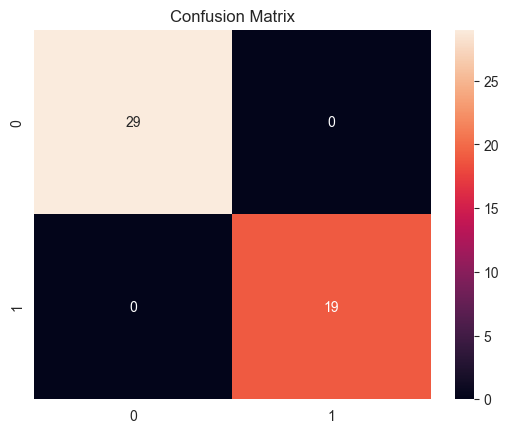

In [77]:
sns.heatmap(clf_dt ,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [78]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        19

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [79]:
clf_dt_scr = classification_report(y_predict,y_test,output_dict=True)


In [80]:
dt_p0=clf_dt_scr["0"]["precision"]
dt_p1=clf_dt_scr["1"]["precision"]
dt_r0=clf_dt_scr["0"]["recall"]
dt_r1=clf_dt_scr["1"]["recall"]
dt_acc=clf_dt_scr['accuracy']
dt_f1=clf_dt_scr['macro avg']['f1-score']

### Plotting ROC Curve and AUC for the model

In [81]:
auc=roc_auc_score(y_test,y_predict)
auc

1.0

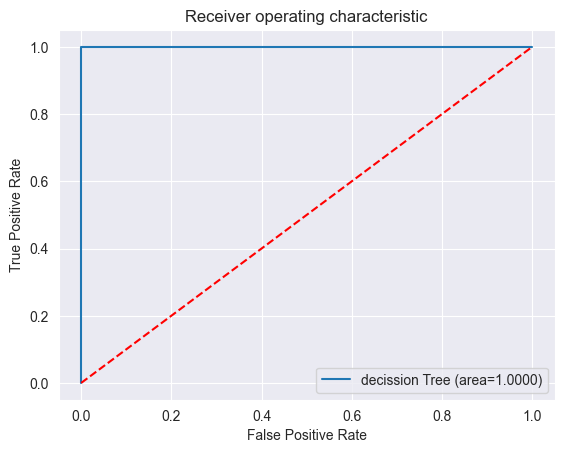

In [82]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict) 
plt.plot(fpr, tpr, label='decission Tree (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model-4: Building SVM Model using SVMSmote Sampling 

#### Performing SVMSmote Sampling

In [83]:
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
X_sm, y_sm = sm.fit_resample(X, y)
print('After undersample dataset shape %s' % Counter(y_sm))

Original dataset shape Counter({1: 78, 0: 25})
After undersample dataset shape Counter({0: 78, 1: 78})


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=12)

In [85]:
# Building model with Kernel = Polynomial


from sklearn.metrics import precision_score,recall_score
from sklearn.svm import SVC

svc_classifier = SVC(kernel='poly',degree = 1) 
svc_classifier.fit(X_train,y_train)
y_pred_poly = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(ac(y_test,y_pred_poly),4))
print("Precision : ",round(precision_score(y_test,y_pred_poly),4))
print("Recall : ",round(recall_score(y_test,y_pred_poly),4))
print("AUC Score : ",round(roc_auc_score(y_test,y_pred_poly),4))
    
    
print("Confusion Matrix: ") 
confusion_matrix(y_test,y_pred_poly)
      
       


Overall Accuracy :  1.0
Precision :  1.0
Recall :  1.0
AUC Score :  1.0
Confusion Matrix: 


array([[13,  0],
       [ 0, 19]])

In [86]:
# Building model with Kernel = RBF
svc_classifier = SVC(kernel='rbf', C=1,gamma = 0.02) 
svc_classifier.fit(X_train,y_train)
y_pred_rbf = svc_classifier.predict(X_test)

print("Overall Accuracy : ",round(ac(y_test,y_pred_rbf),4))
print("Precision : ",round(precision_score(y_test,y_pred_rbf),4))
print("Recall : ",round(recall_score(y_test,y_pred_rbf),4))
print("AUC Score : ",round(roc_auc_score(y_test,y_pred_rbf),4))
    
    
print("Confusion Matrix: ") 
confusion_matrix(y_test,y_pred_rbf)

Overall Accuracy :  1.0
Precision :  1.0
Recall :  1.0
AUC Score :  1.0
Confusion Matrix: 


array([[13,  0],
       [ 0, 19]])

In [87]:
# Building model with Kernel = Liner

svc_classifier = SVC(kernel='linear') 
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)
print("Overall Accuracy : ",round(ac(y_test,y_pred),4))


Overall Accuracy :  1.0


In [88]:
svm_conf = confusion_matrix(y_test,y_pred)
svm_conf

array([[13,  0],
       [ 0, 19]])

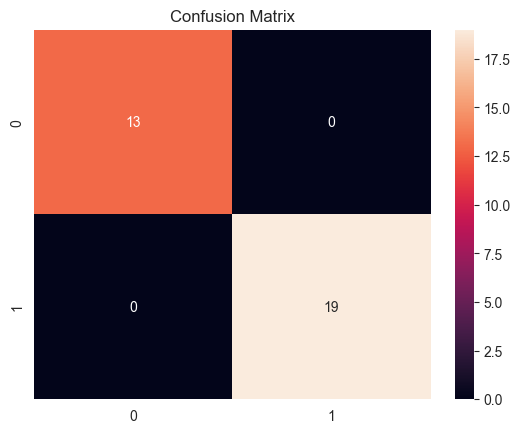

In [89]:
sns.heatmap(svm_conf ,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [90]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        19

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [91]:
svm_scr = classification_report(y_pred,y_test,output_dict=True)

In [92]:
svm_p0=svm_scr["0"]["precision"]
svm_p1=svm_scr["1"]["precision"]
svm_r0=svm_scr["0"]["recall"]
svm_r1=svm_scr["1"]["recall"]
svm_acc=svm_scr['accuracy']
svm_f1=svm_scr['macro avg']['f1-score']

### Plotting ROC Curve and AUC for the model

In [93]:
auc=roc_auc_score(y_test,y_pred)
auc

1.0

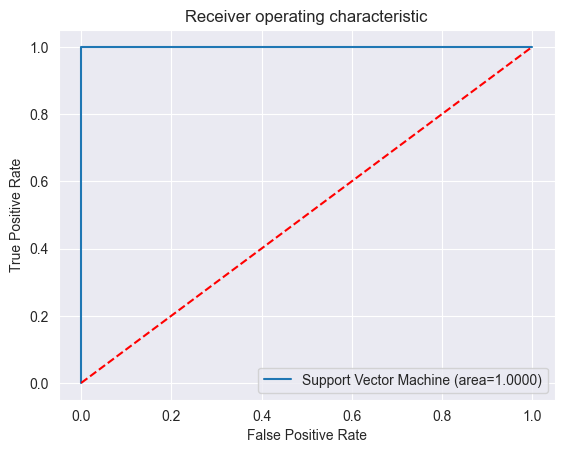

In [94]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred) 
plt.plot(fpr, tpr, label='Support Vector Machine (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model-5: Building AdaBoost & Random Forest Model Using  SMOTEENN (Mix of undersample and oversample)

#### Performing Smoteen Balancing

In [95]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN()

print('Original dataset shape %s' % Counter(y))

X_smt, y_smt = smt.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_smt))

Original dataset shape Counter({1: 78, 0: 25})
After undersample dataset shape Counter({0: 77, 1: 76})


In [96]:
X_train_smt,X_test_smt,y_train_smt,y_test_smt = train_test_split(X_smt,y_smt,test_size=0.2,random_state=12)

###  Random Forest 

In [97]:
# Evaluate the base model(without hypertuning)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=5,shuffle=True)
result = cross_val_score(rfc1, X_train_smt, y_train_smt, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print("Accuracy is:",np.mean(result))

Accuracy is: 0.9916666666666666


In [98]:
rfc1.fit(X_train_smt,y_train_smt)

pred1 = rfc1.predict(X_test_smt)

from sklearn.metrics import classification_report

print(classification_report(y_test_smt, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        15

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [99]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
conf_matrix2=confusion_matrix(y_test_smt, pred1)
conf_matrix2

array([[16,  0],
       [ 0, 15]])

### Hypertuning using RandomizedSearchCV

In [100]:
from sklearn.model_selection import RandomizedSearchCV

cv = StratifiedKFold(n_splits=5,shuffle=True)

rfc_r=RandomForestClassifier()

random_grid = {'n_estimators': [x for x in range(10,200,10)],
               'max_features': [x for x in range(3,7)],
               'max_depth': [x for x in range(2,4)],
               'min_samples_split':[x for x in range(5,30,5)],
               'min_samples_leaf': [x for x in range(2,7)]}
                                    

random_cv = RandomizedSearchCV(estimator = rfc_r, param_distributions = random_grid, n_iter = 100,
                               cv = cv,scoring='accuracy', verbose=2, random_state=42, n_jobs = -1)  
                                    
# fitting the model for random grid search 
random_cv.fit(X_train_smt, y_train_smt) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3],
                                        'max_features': [3, 4, 5, 6],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190]},
                   random_state=42, scoring='accuracy', verbose=2)

In [101]:
# Finding best parameter after tuning 

print("Best score for RandomSearchCV is:",random_cv.best_score_)
print("Optimal parameters for RandomSearchCV is:",random_cv.best_params_) 

Best score for RandomSearchCV is: 0.9916666666666666
Optimal parameters for RandomSearchCV is: {'n_estimators': 160, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 2}


In [102]:
## storing the best parameters in a variable
## fitting the model with best parameters

rs= random_cv.best_params_

rfc2= RandomForestClassifier(n_estimators=rs['n_estimators'], min_samples_split=rs['min_samples_split'],
                             min_samples_leaf=rs['min_samples_leaf'],max_features=rs['max_features'],
                             max_depth=rs['max_depth'])

rfc2.fit(X_train_smt,y_train_smt)

RandomForestClassifier(max_depth=2, max_features=5, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=160)

In [103]:
result = cross_val_score(rfc2, X_train_smt, y_train_smt, scoring='accuracy',  n_jobs=-1, error_score='raise')

print("Accuracy is:",np.mean(result))

Accuracy is: 0.992


In [104]:
rf_best = random_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, max_features=5, min_samples_leaf=2,
                       min_samples_split=15, n_estimators=160)

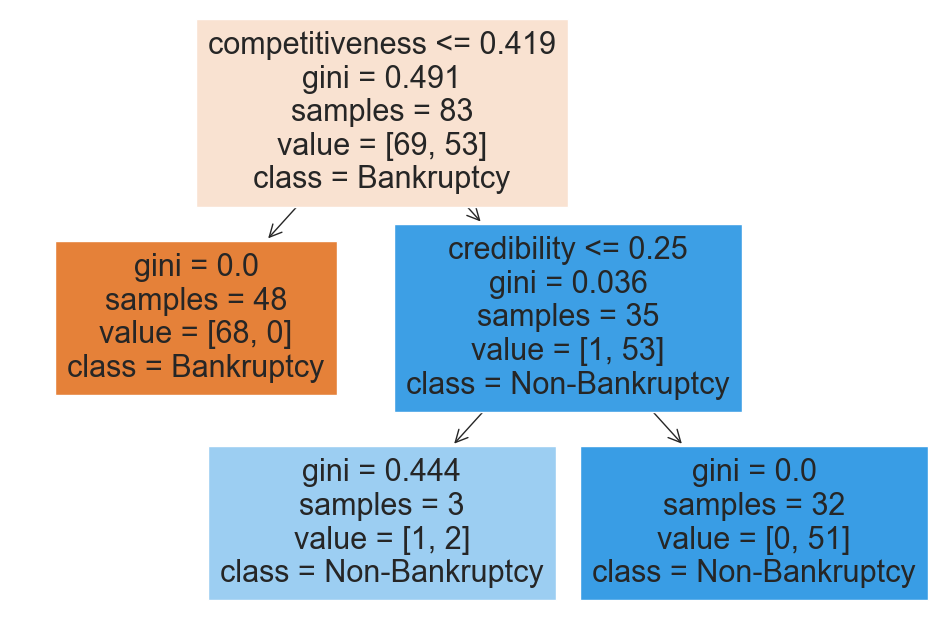

In [105]:
cn = ['Bankruptcy','Non-Bankruptcy']
plt.figure(figsize=(12,8))
tree.plot_tree(rf_best.estimators_[9], feature_names = df.columns,class_names=cn,filled=True)
plt.show()

In [106]:
# Prediction and accuracy score calculation

pred2 = rfc2.predict(X_test_smt)


print(classification_report(y_test_smt, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        15

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [107]:
rf_conf=confusion_matrix(y_test_smt,pred2)
rf_conf

array([[16,  0],
       [ 0, 15]])

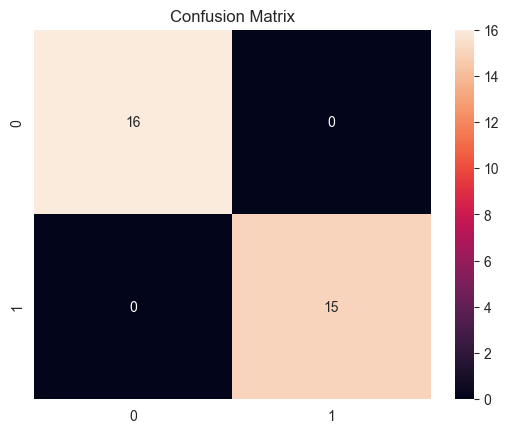

In [108]:
sns.heatmap(rf_conf ,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [109]:
rm3=classification_report(pred2,y_test_smt,output_dict=True)

In [110]:
rfc_p0=rm3["0"]["precision"]
rfc_p1=rm3["1"]["precision"]
rfc_r0=rm3["0"]["recall"]
rfc_r1=rm3["1"]["recall"]
rfc_acc=rm3['accuracy']
rfc_f1=rm3['macro avg']['f1-score']




### Plotting ROC Curve and AUC for the model

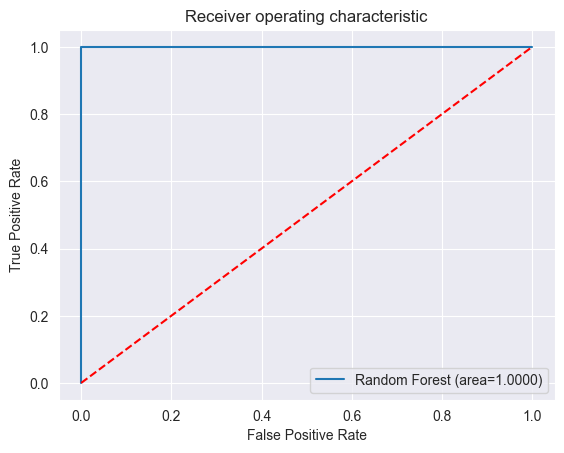

In [111]:
auc=roc_auc_score(y_test_smt,pred2)
auc
fpr, tpr, thresholds = roc_curve(y_test_smt,pred2) 
plt.plot(fpr, tpr, label='Random Forest (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model-6: AdaBoost 

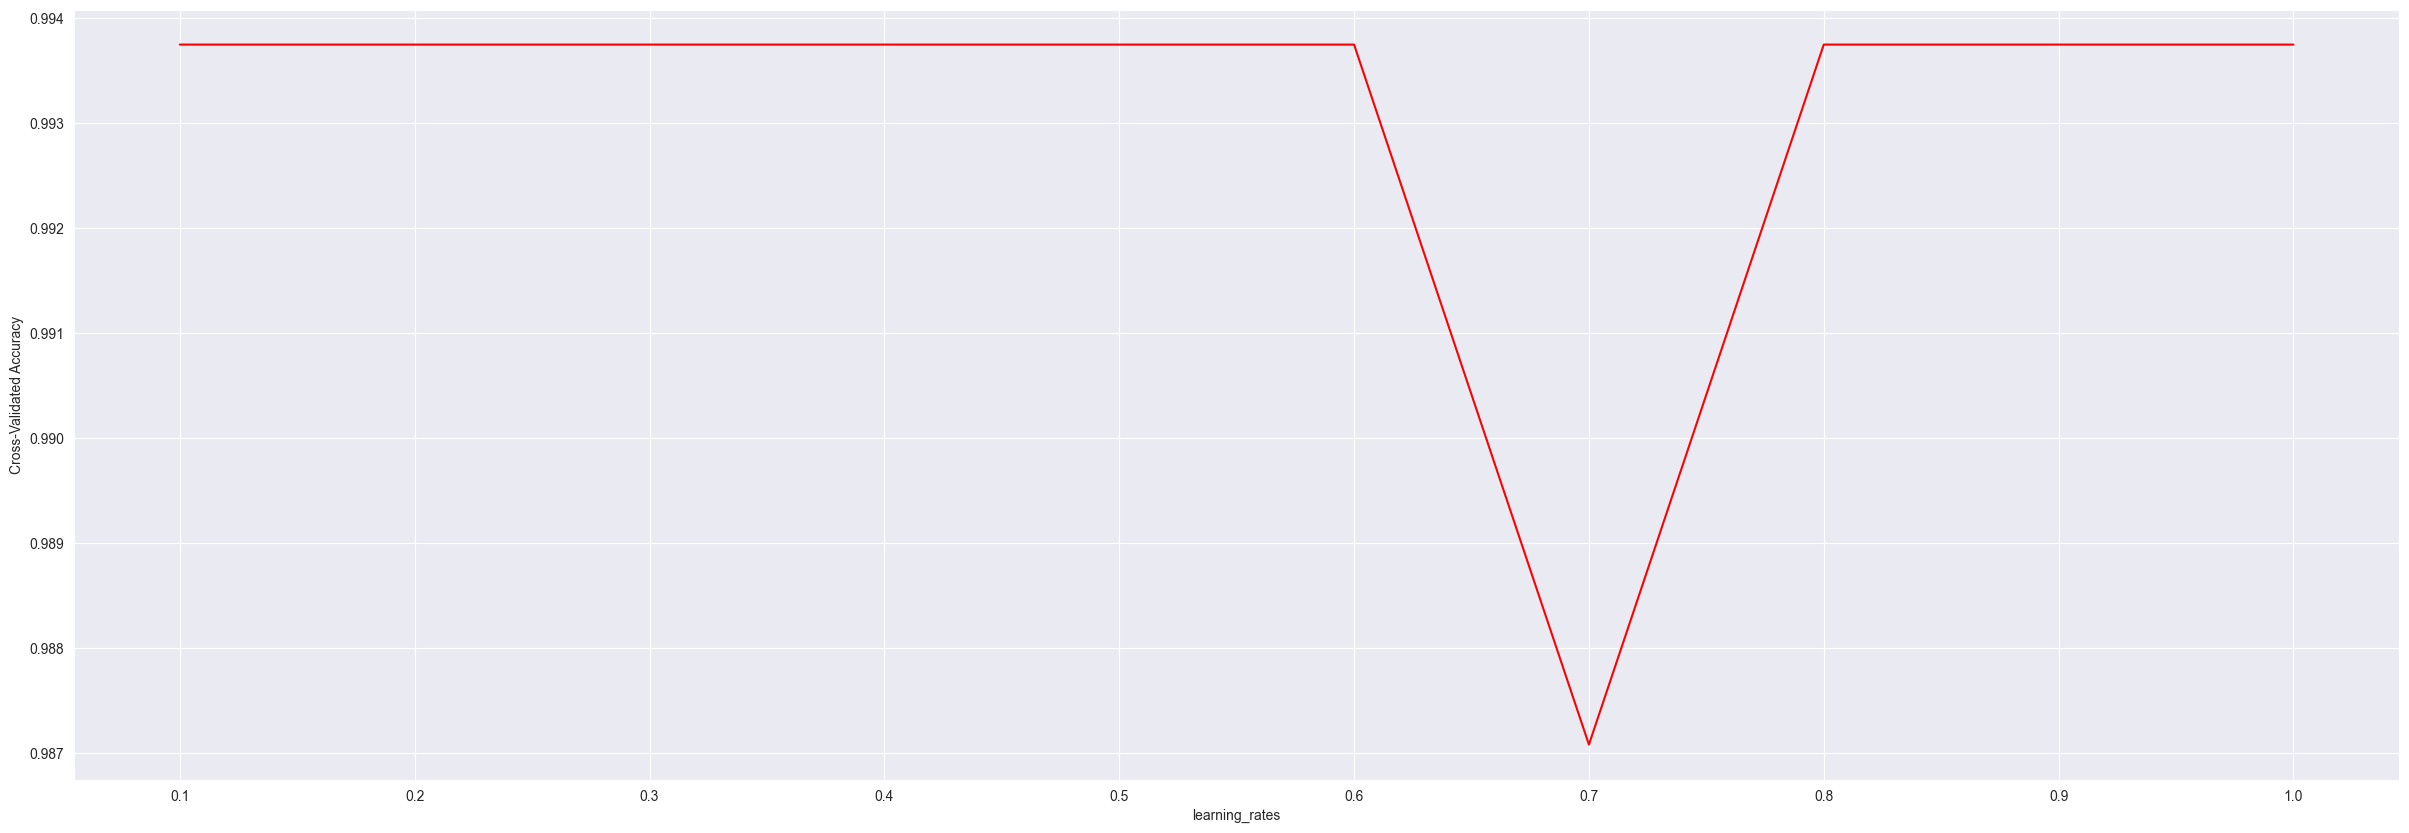

In [112]:
import matplotlib.pyplot as plt 
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier

# choose k between 1 to 20
learning_rates = np.linspace(0.1,1,10)
k_scores = []

num_trees=10

# use iteration to caclulator different k in models, then return the average accuracy based 
# on the cross validation
for learning_rate in learning_rates:
    ab =  AdaBoostClassifier(n_estimators=num_trees, learning_rate=learning_rate,random_state=9)
    scores = cross_val_score(ab, X_smt, y_smt, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(30,10))
plt.plot(learning_rates, k_scores,color="red")

plt.xlabel('learning_rates')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(learning_rates)
plt.show()

As we can see score is max at learning rate 0.8 onwards , we will build the model with max learning rate .

In [113]:
num_trees = 10
boost = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.8,random_state=9)
results = cross_val_score(boost, X_smt, y_smt, cv=10)
print(results.mean())

0.99375


In [114]:
boost.fit(X_train_smt,y_train_smt)
pred4= boost.predict(X_test_smt)
pred4

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0])

In [115]:
conf_matrix4=confusion_matrix(y_test_smt,pred4)
conf_matrix4

array([[16,  0],
       [ 0, 15]])

In [116]:
ada_conf=confusion_matrix(y_test_smt,pred2)
ada_conf

array([[16,  0],
       [ 0, 15]])

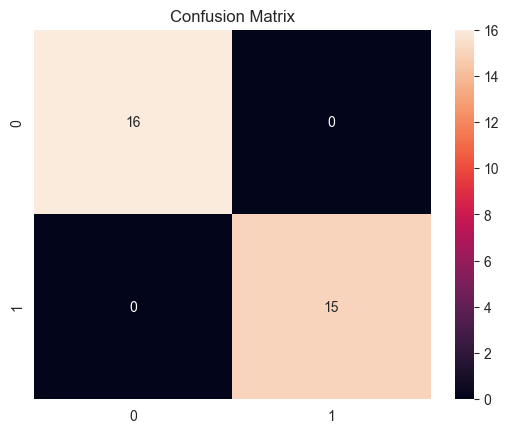

In [117]:
sns.heatmap(ada_conf ,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [118]:
print(classification_report(y_test_smt, pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        15

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [119]:
rm5=classification_report(pred4,y_test_smt,output_dict=True)

In [120]:
ada_p0=rm5["0"]["precision"]
ada_p1=rm5["1"]["precision"]
ada_r0=rm5["0"]["recall"]
ada_r1=rm5["1"]["recall"]
ada_acc=rm5['accuracy']
ada_f1=rm5['macro avg']['f1-score']

### Plotting ROC Curve and AUC for the model

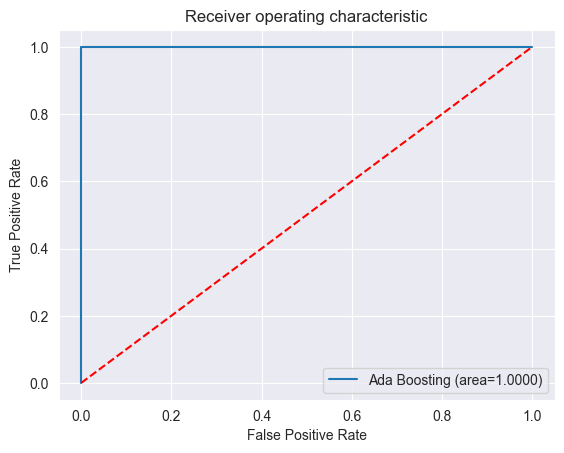

In [121]:
auc=roc_auc_score(y_test_smt,pred4)
auc
fpr, tpr, thresholds = roc_curve(y_test_smt,pred4) 
plt.plot(fpr, tpr, label='Ada Boosting (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model-7: Creating Bagging model with Undersampling

#### Undersampling

In [122]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

print('Original dataset shape %s' % Counter(y))

X_rus, y_rus = rus.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_rus))

Original dataset shape Counter({1: 78, 0: 25})
After undersample dataset shape Counter({0: 25, 1: 25})


In [123]:
X_train,X_test,y_train,y_test=train_test_split(X_rus,y_rus,test_size=0.3,shuffle=True)

In [124]:
from sklearn.ensemble import BaggingClassifier
num_trees = 20

bagging = BaggingClassifier(max_samples=1.0,n_estimators=num_trees,random_state=8)
results = cross_val_score(bagging, X, y, cv=10)
print(results.mean())

0.99


In [125]:
bagging.fit(X_train,y_train)
pred3= bagging.predict(X_test)
pred3

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [126]:
bagging_conf=confusion_matrix(y_test,pred3)
bagging_conf

array([[9, 1],
       [0, 5]])

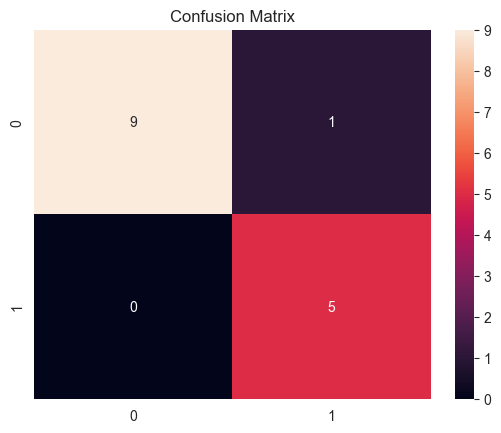

In [127]:
sns.heatmap(bagging_conf ,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [128]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.94      0.93      0.93        15



In [129]:
rm4=classification_report(pred3,y_test,output_dict=True)


In [130]:
bag_p0=rm4["0"]["precision"]
bag_p1=rm4["1"]["precision"]
bag_r0=rm4["0"]["recall"]
bag_r1=rm4["1"]["recall"]
bag_acc=rm4['accuracy']
bag_f1=rm4['macro avg']['f1-score']

### Plotting ROC Curve and AUC for the model

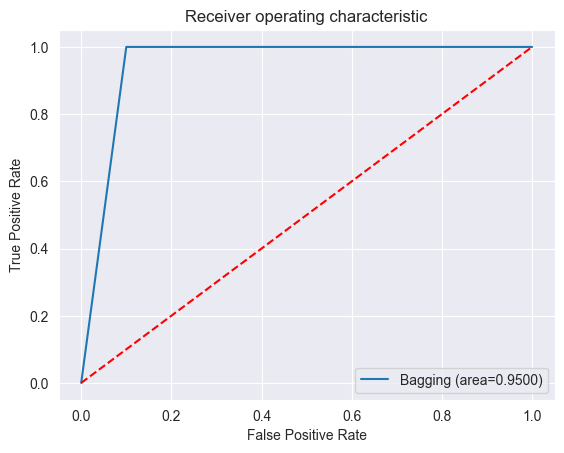

In [131]:
auc=roc_auc_score(y_test,pred3)
auc
fpr, tpr, thresholds = roc_curve(y_test,pred3) 
plt.plot(fpr, tpr, label='Bagging (area=%0.4f)'% auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Final Results

In [132]:
results={'Models':['Knearestneighbour','Logistic model ','Decision Tree',
                   'Support Vector Machine','Random forest','Bagging','Boosting'],
    'Representation':['KNN','LR','DT','SVM','RF','BG','ADA'],
    'precision 0':[knn_p0,logi_p0,dt_p0,svm_p0,rfc_p0,bag_p0,ada_p0],
    'precision 1':[knn_p1,logi_p1,dt_p1,svm_p1,rfc_p1,bag_p1,ada_p1],
    'recall 0':[knn_r0,logi_r0,dt_r0,svm_r0,rfc_r0,bag_r0,ada_r0],
    'recall 1':[knn_r1,logi_r1,dt_r1,svm_r1,rfc_r1,bag_r1,ada_r1],
    'accuracy':[knn_acc,logi_acc,dt_acc,svm_acc,rfc_acc,bag_acc,ada_acc],
    'f1-score':[knn_f1,logi_f1,dt_f1,svm_f1,rfc_f1,bag_f1,ada_f1]}

output=pd.DataFrame(results)
output

,Models,Representation,precision 0,precision 1,recall 0,recall 1,accuracy,f1-score
0,Knearestneighbour,KNN,1.0,0.961538,0.954545,1.000000,0.978723,0.978568
1,Logistic model,LR,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
2,Decision Tree,DT,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
3,Support Vector Machine,SVM,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
4,Random forest,RF,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
5,Bagging,BG,0.9,1.000000,1.000000,0.833333,0.933333,0.928230
6,Boosting,ADA,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


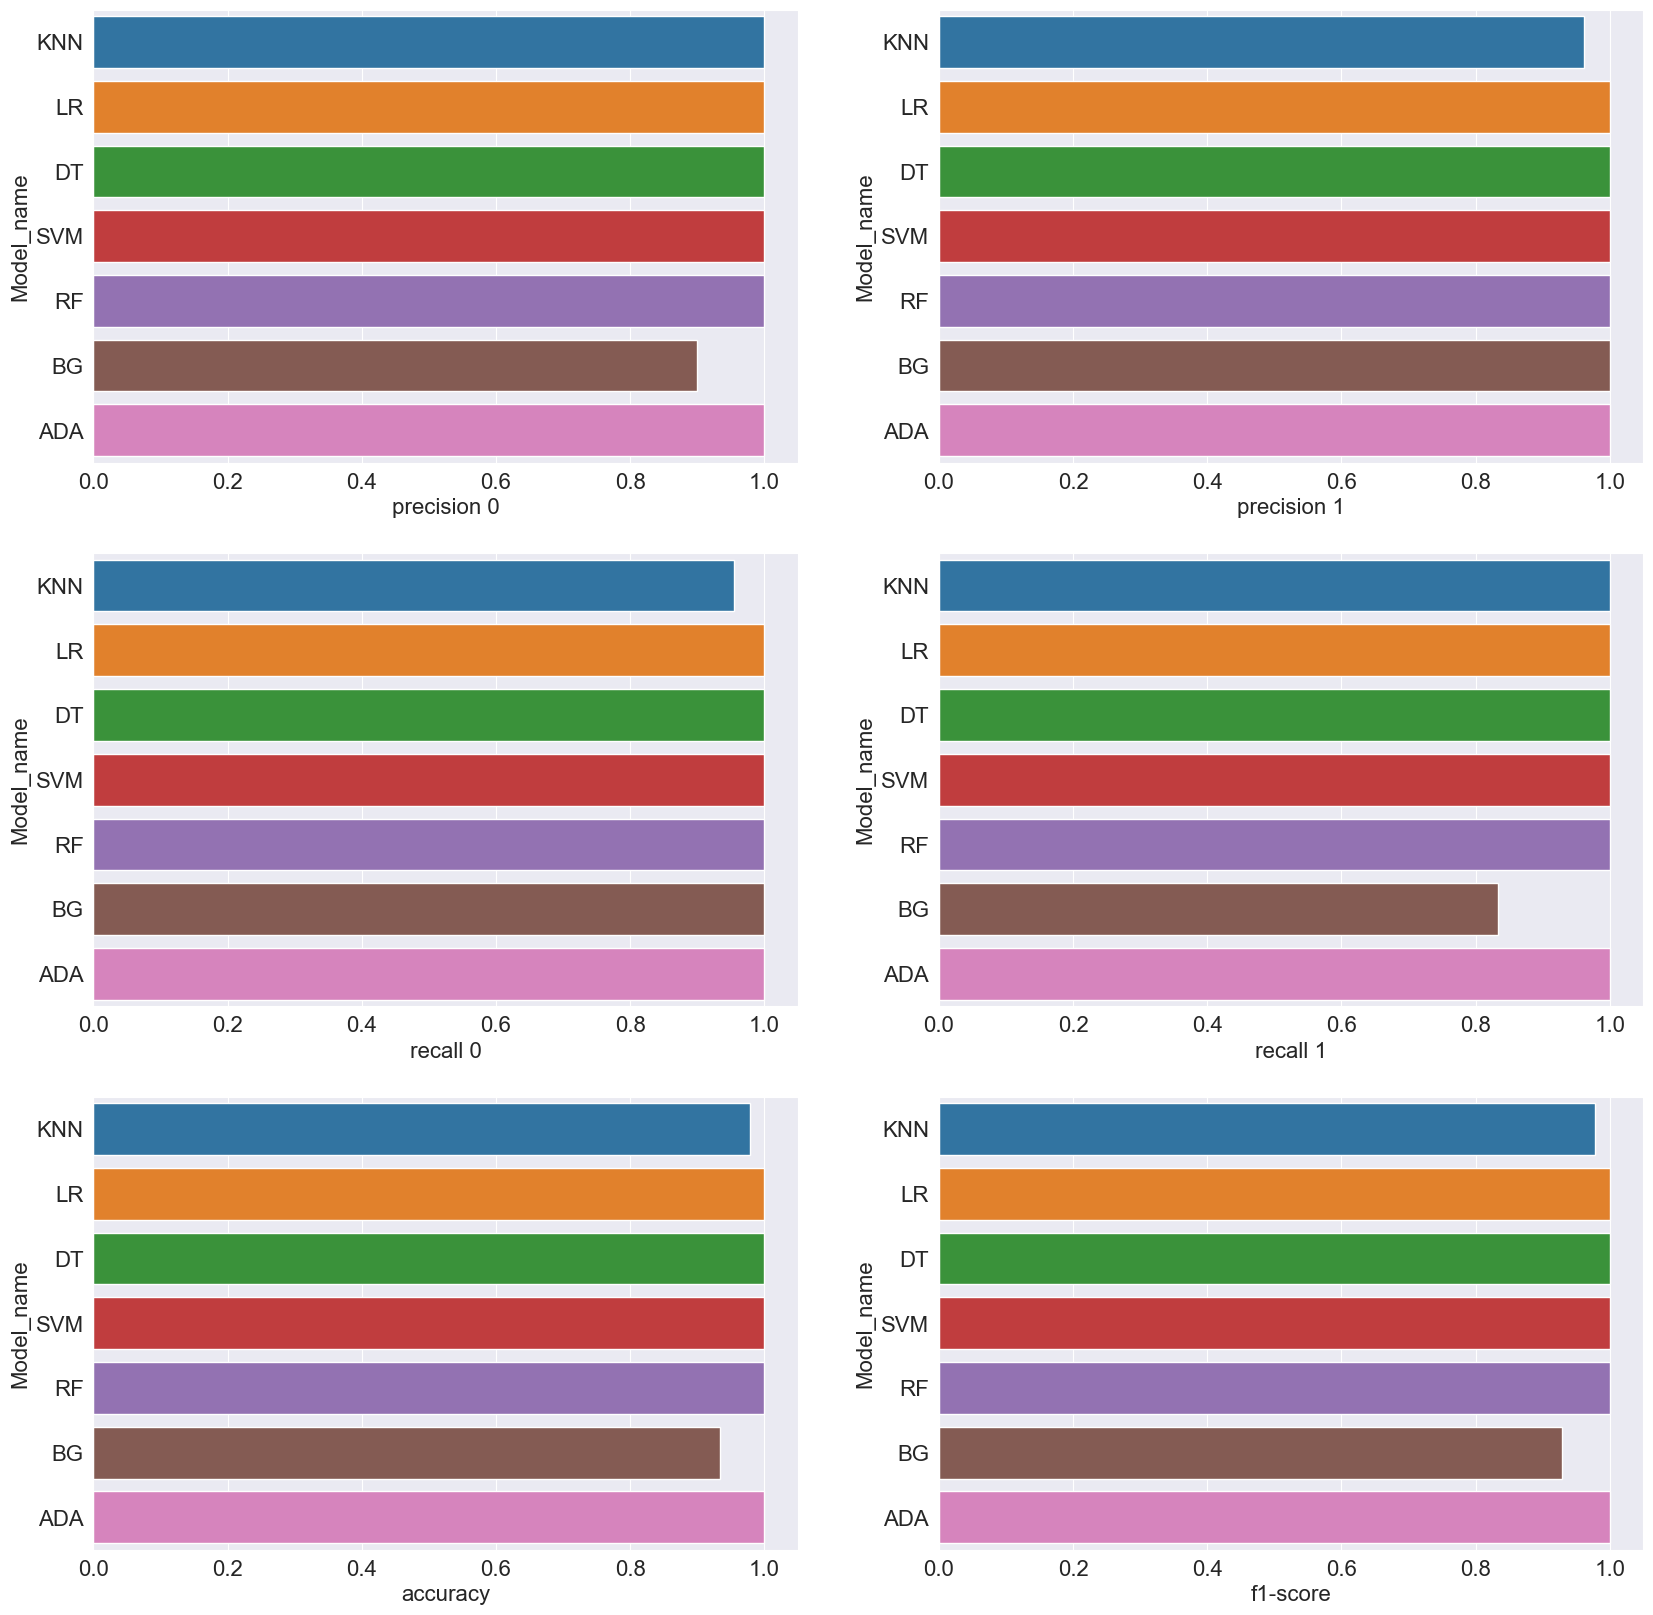

In [133]:
plt.figure(figsize=(20,20))
for i, j in zip(output.columns[2:], range(1,7)):
    plt.subplot(3,2,j)
    sns.barplot(x=output[i], y=output.Representation)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(i,fontsize=16)
    plt.ylabel("Model_name",fontsize=16)
plt.show()

### Conclusion:
#### AdaBoost Model Using  SMOTEENN (Mix of undersample and oversample) is consistently giving the best results of precision, recall, accuracy and f1-scores in predicting both the classes.
#### Hence consider this as our final model.

### Predicted values

In [134]:
boost.predict(X_test_smt)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0])

In [135]:
final_pred = pd.DataFrame(columns=["Predicted_values"],data=boost.predict(X_test_smt))
final_pred.head()

,Predicted_values
0,0
1,1
2,0
3,1
4,0


In [136]:
final_pred.value_counts()

Predicted_values
0                   16
1                   15
dtype: int64

<AxesSubplot: xlabel='Predicted_values', ylabel='count'>

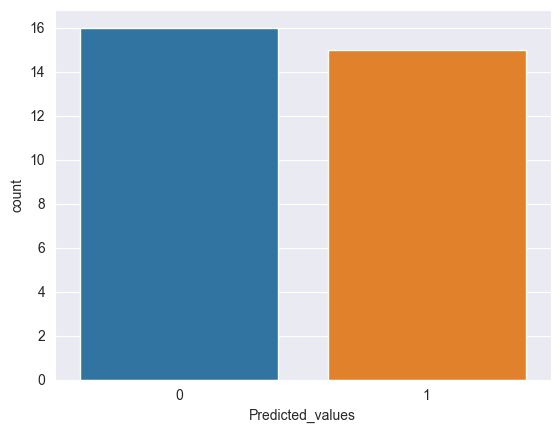

In [137]:
sns.countplot(x=final_pred.Predicted_values,data=final_pred)

### Probabilities of prediction

In [138]:
y_prob_df = pd.DataFrame(boost.predict_proba(X_test_smt))
y_prob_df.head()

,0,1
0,0.990560,0.009440
1,0.000320,0.999680
2,0.998408,0.001592
3,0.000037,0.999963
4,0.987966,0.012034


In [139]:
prob_data = pd.concat([X_test_smt.reset_index(drop=True),y_prob_df.reset_index(drop=True)],axis=1)
prob_data.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,0,1
0,0.090069,0.909931,0.0,0.0,0.0,0.000000,0.990560,0.009440
1,0.000000,0.500000,0.5,0.5,1.0,0.500000,0.000320,0.999680
2,0.500000,1.000000,0.0,0.0,0.0,0.513487,0.998408,0.001592
3,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000037,0.999963
4,1.000000,1.000000,0.0,1.0,0.0,1.000000,0.987966,0.012034
5,0.000000,0.000000,0.5,1.0,1.0,0.000000,0.000037,0.999963
6,0.399217,0.500000,0.0,0.0,0.0,0.100783,0.995869,0.004131
7,1.000000,1.000000,0.5,1.0,0.5,1.000000,0.038985,0.961015
8,1.000000,1.000000,0.0,0.5,0.0,0.388614,0.991732,0.008268
9,0.000000,0.500000,0.0,0.5,1.0,0.500000,0.011544,0.988456


### Deployment of the model

#### Saving the models

In [140]:
import pickle 
pickle_out_knn = open("G5_P177_Bankruptcy_knn.pkl", mode = "wb") 
pickle.dump(clf_knn, pickle_out_knn) 
pickle_out_knn.close()

In [141]:
pickle_out_lr = open("G5_P177_Bankruptcy_lr.pkl", mode = "wb") 
pickle.dump(model, pickle_out_lr) 
pickle_out_lr.close()

In [142]:
pickle_out_dt = open("G5_P177_Bankruptcy_dt.pkl", mode = "wb") 
pickle.dump(tree_clf, pickle_out_dt) 
pickle_out_dt.close()

In [143]:
pickle_out_svm = open("G5_P177_Bankruptcy_svm.pkl", mode = "wb") 
pickle.dump(svc_classifier, pickle_out_svm) 
pickle_out_svm.close()

In [144]:
pickle_out_rf = open("G5_P177_Bankruptcy_rf.pkl", mode = "wb") 
pickle.dump(rfc2, pickle_out_rf) 
pickle_out_rf.close()

In [145]:
pickle_out_bag = open("G5_P177_Bankruptcy_bag.pkl", mode = "wb") 
pickle.dump(bagging, pickle_out_bag) 
pickle_out_bag.close()

In [146]:
pickle_out_bag = open("G5_P177_Bankruptcy_bag.pkl", mode = "wb") 
pickle.dump(bagging, pickle_out_bag) 
pickle_out_bag.close()

In [147]:
pickle_out_bst = open("G5_P177_Bankruptcy_bst.pkl", mode = "wb") 
pickle.dump(boost, pickle_out_bst) 
pickle_out_bst.close()

#### Deployment using Streamlit

In [148]:
%%writefile G5_P177_Bankruptcy_app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in_knn = open('G5_P177_Bankruptcy_knn.pkl', 'rb') 
classifier_knn = pickle.load(pickle_in_knn)

pickle_in_lr = open('G5_P177_Bankruptcy_lr.pkl', 'rb') 
classifier_lr = pickle.load(pickle_in_lr)

pickle_in_dt = open('G5_P177_Bankruptcy_dt.pkl', 'rb') 
classifier_dt = pickle.load(pickle_in_dt)

pickle_in_svm = open('G5_P177_Bankruptcy_svm.pkl', 'rb') 
classifier_svm = pickle.load(pickle_in_svm)

pickle_in_rf = open('G5_P177_Bankruptcy_rf.pkl', 'rb') 
classifier_rf = pickle.load(pickle_in_rf)

pickle_in_bag = open('G5_P177_Bankruptcy_bag.pkl', 'rb') 
classifier_bag = pickle.load(pickle_in_bag)

pickle_in_bst = open('G5_P177_Bankruptcy_bst.pkl', 'rb') 
classifier_bst = pickle.load(pickle_in_bst)


@st.cache()
# defining the function which will make the prediction using the data which the user inputs 
def prediction(industrial_risk, management_risk, financial_flexibility, credibility, 
               competitiveness, operating_risk, classifier):   
 
    # Pre-processing user input    
    if industrial_risk == "Low":
        industrial_risk = 0
    elif industrial_risk == "Medium":
        industrial_risk = 0.5
    else:
        industrial_risk = 1
 
    if management_risk == "Low":
        management_risk = 0
    elif management_risk == "Medium":
        management_risk = 0.5
    else:
        management_risk = 1
 
    if financial_flexibility == "Low":
        financial_flexibility = 0
    elif financial_flexibility == "Medium":
        financial_flexibility = 0.5
    else:
        financial_flexibility = 1
        
    if credibility == "Low":
        credibility = 0
    elif credibility == "Medium":
        credibility = 0.5
    else:
        credibility = 1
        
    if competitiveness == "Low":
        competitiveness = 0
    elif competitiveness == "Medium":
        competitiveness = 0.5
    else:
        competitiveness = 1 
        
    if operating_risk == "Low":
        operating_risk = 0
    elif operating_risk == "Medium":
        operating_risk = 0.5
    else:
        operating_risk = 1 
        
        
    # Making predictions 
    if classifier== "K-Nearest Neighbors":
        prediction = classifier_knn.predict( 
            [[industrial_risk, management_risk, 
              financial_flexibility, credibility, competitiveness, operating_risk]])
    elif classifier=="Logistic Regression":
        prediction = classifier_dt.predict( 
            [[industrial_risk, management_risk, 
              financial_flexibility, credibility, competitiveness, operating_risk]])
    elif classifier=="Decision Tree":
        prediction = classifier_dt.predict( 
            [[industrial_risk, management_risk, 
              financial_flexibility, credibility, competitiveness, operating_risk]])
    elif classifier=="Support Vector Machines":
        prediction = classifier_svm.predict( 
            [[industrial_risk, management_risk, 
              financial_flexibility, credibility, competitiveness, operating_risk]])
    elif classifier=="Random Forests":
        prediction = classifier_rf.predict( 
            [[industrial_risk, management_risk, 
              financial_flexibility, credibility, competitiveness, operating_risk]])
    elif classifier=="Bagging":
        prediction = classifier_bag.predict( 
            [[industrial_risk, management_risk, 
              financial_flexibility, credibility, competitiveness, operating_risk]])
    elif classifier=="AdaBoosting(Deployement Model)":
        prediction = classifier_bst.predict( 
            [[industrial_risk, management_risk, 
              financial_flexibility, credibility, competitiveness, operating_risk]])
    
    if prediction == 1:
        pred = 'Non-Bankruptcy'
    else:
        pred = 'Bankruptcy'
    return pred
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:black;padding:13px"> 
    <h1 style ="color:red;text-align:center;">G5-P177 Bankruptcy Prevention App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    classifier = st.selectbox('**ML MODEL NAME**',("K-Nearest Neighbors", "Logistic Regression",
                                                  "Decision Tree","Support Vector Machines",
                                                  "Random Forests","Bagging","AdaBoosting(Deployement Model)"))
    industrial_risk = st.selectbox('**INDUSTRIAL RISK**',("Low", "Medium", "High"))
    management_risk = st.selectbox('**MANAGEMENT RISK**',("Low", "Medium", "High")) 
    financial_flexibility = st.selectbox('**FINANCIAL FLEXIBILITY**',("Low", "Medium", "High"))
    credibility = st.selectbox('**CREDIBILITY**',("Low", "Medium", "High")) 
    competitiveness = st.selectbox('**COMPETITIVENESS**',("Low", "Medium", "High")) 
    operating_risk = st.selectbox('**OPERATING RISK**',("Low", "Medium", "High")) 
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(industrial_risk, management_risk, financial_flexibility, 
                            credibility, competitiveness, operating_risk,classifier) 
        if result == 'Non-Bankruptcy':
            st.success('**The company does not file for Bankruptcy**', icon="✅")
            st.balloons()
        elif result == 'Bankruptcy':
            st.success('**The company files for Bankruptcy**',icon="❌")
        print(result)
     
if __name__=='__main__': 
    main()

Overwriting G5_P177_Bankruptcy_app.py


### Step-8: Conclusion

+ AdaBoost Model Using  SMOTEENN (Mix of undersample and oversample) is consistently giving the best results of precision, recall, accuracy and f1-scores in predicting both the classes
+ All the models are deployed using streamlit.
+ To access the app: 
    + Open Anaconda Navigator
    + Access to Environments--> base(root) --> Open Terminal
    + To start the app locally, simply run the following command in the terminal, in the same folder as your G5_P177_Bankruptcy_app.py file exists.
    + In the terminal, run the command: streamlit run G5_P177_Bankruptcy_app.py